### Exercise 1
<div class="alert-success">

1. Reproject your country's map layers.
2. Plot the reprojected layers
3. Save the reprojected layers as **gpkg**.
    
</div>

In [ ]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [ ]:
type(countries)

geopandas.geodataframe.GeoDataFrame

<Axes: >

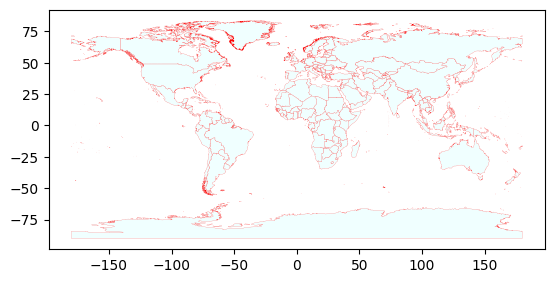

In [ ]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [ ]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [ ]:
# what geo?
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

In [ ]:
# ONE file - SEVERAL layers
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [ ]:
paises = countries.COUNTRY.unique().tolist()
print(paises)

['Aruba (Netherlands)', 'Antigua and Barbuda', 'Afghanistan', 'Algeria', 'Azerbaijan', 'Albania', 'Armenia', 'Andorra', 'Angola', 'American Samoa (US)', 'Argentina', 'Australia', 'Austria', 'Anguilla (UK)', 'Antarctica', 'Bahrain', 'Barbados', 'Botswana', 'Bermuda (UK)', 'Belgium', 'Bahamas', 'Bangladesh', 'Belize', 'Bosnia and Herzegovina', 'Bolivia', 'Myanmar', 'Benin', 'Belarus', 'Solomon Islands', 'Brazil', 'Bhutan', 'Bulgaria', 'Bouvet Island (Norway)', 'Brunei', 'Burundi', 'Canada', 'Cambodia', 'Chad', 'Sri Lanka', 'Congo', 'Democratic Republic of the Congo', 'China', 'Chile', 'Cayman Islands (UK)', 'Cocos (Keeling) Islands (Australia)', 'Cameroon', 'Comoros', 'Colombia', 'Northern Mariana Islands (US)', 'Costa Rica', 'Central African Republic', 'Cuba', 'Cape Verde', 'Cook Islands (New Zealand)', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Jarvis Island (US)', 'Dominican Republic', 'Ecuador', 'Egypt', 'Ireland', 'Equatorial Guinea', 'Estonia', 'Eritrea', 'El Salvador', 'Ethiopi

In [ ]:
usa=countries[countries.COUNTRY=='United States']

In [ ]:
usa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# check units of measurement
usa.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
# is this CRS projected?
usa.crs.is_projected

False

**1. Reproject your country's map layers.**


In [ ]:
#CRS recommended dor USA (meters:5070):se confirma que las coordenadas están en metros.
usa.to_crs(5070).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
usa.to_crs(5070).centroid

,0
229,POINT (-700644.82 2429813.928)


**2. Plot the reprojected layers**

<Axes: >

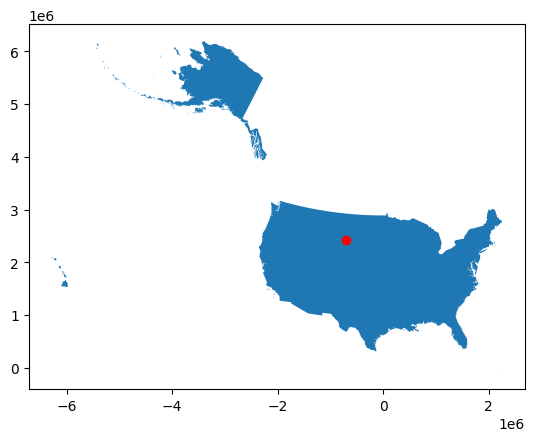

In [ ]:
# replotting:
base5070 = usa.to_crs(5070).plot()
usa.to_crs(5070).centroid.plot(color='red', ax=base5070)

In [ ]:
cities_usa_5070 = cities[cities.COUNTRY == 'United States'].to_crs(5070)

In [ ]:
# Recorta los ríos a la extensión de EE. UU.
riversUSA_clipped = gpd.clip(rivers, usa)

# Reproyecta USA al CRS 5070
usa_5070 = usa.to_crs(5070)

# Reproyecta los ríos recortados al mismo CRS
rivers_usa_5070 = riversUSA_clipped.to_crs(usa_5070.crs)

**3. Save the reprojected layers as gpkg**.

In [ ]:
import os

# Guardar los datos en un archivo GeoPackage
usa_5070.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='country', driver="GPKG")
cities_usa_5070.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='cities', driver="GPKG")
rivers_usa_5070.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='rivers', driver="GPKG")
# usa_5070.centroid.to_file(os.path.join("maps", "usaMaps_5070.gpkg"), layer='centroid', driver="GPKG")

### Exercise 2
<div class="alert-success">

1. Find the airports for your country [here](https://ourairports.com/data/). The data is in a CSV file.
2. Create projected layer of airports.
3. Plot all the layers and airports on top.
    
</div>

**1. Find the airports for your country here. The data is in a CSV file.**

In [ ]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","airports.csv"))
# Filtra por EE.UU.
infoairports = infoairports[infoairports["iso_country"] == "US"]
# some rows
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
82310,26367,Z93,small_airport,Copper Center 2 Airport,61.943713,-145.299398,1150.0,NaN,US,US-AK,Copper Center,no,NaN,CZC,NaN,Z93,NaN,https://en.wikipedia.org/wiki/Copper_Center_Ai...,NaN
82311,26368,Z95,small_airport,Cibecue Airport,34.001681,-110.455115,5037.0,NaN,US,US-AZ,Cibecue,no,NaN,NaN,NaN,Z95,NaN,https://en.wikipedia.org/wiki/Cibecue_Airport,NaN
82857,26369,ZNC,small_airport,Nyac Airport,60.980701,-159.994003,460.0,NaN,US,US-AK,Nyac,no,NaN,ZNC,ZNC,ZNC,NaN,https://en.wikipedia.org/wiki/Nyac_Airport,NaN
83096,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,NaN,NaN,87TX,87TX,NaN,NaN,NaN


In [ ]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [ ]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32098 entries, 0 to 83096
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           32098 non-null  object 
 1   type           32098 non-null  object 
 2   latitude_deg   32098 non-null  float64
 3   longitude_deg  32098 non-null  float64
 4   elevation_ft   30050 non-null  float64
 5   municipality   32042 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


In [ ]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [ ]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32098 entries, 0 to 83096
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           32098 non-null  object 
 1   type           32098 non-null  object 
 2   latitude_deg   32098 non-null  float64
 3   longitude_deg  32098 non-null  float64
 4   elevation_ft   30050 non-null  float64
 5   municipality   32042 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.7+ MB


**2. (Create projected layer of airports) y 3. (Plot all the layers and airports on top.)**

<Axes: >

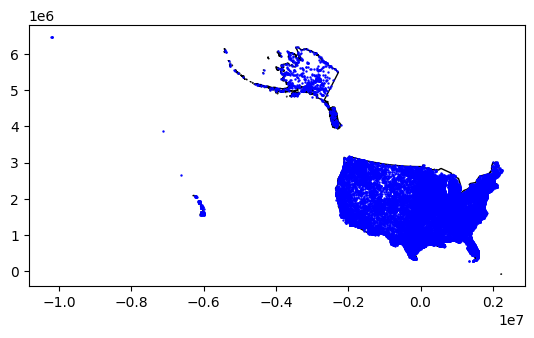

In [ ]:
# Graficar el mapa base de USA (en CRS 5070)
base = usa_5070.plot(color='white', edgecolor='black')

# Reproyectar los aeropuertos a CRS 5070
infoairports_5070 = gpd.GeoDataFrame(
    infoairports,
    geometry=gpd.points_from_xy(infoairports.longitude_deg, infoairports.latitude_deg),
    crs=4326  # CRS original geográfico (lat/lon)
).to_crs(5070)

# Graficar los aeropuertos sobre el mapa base
infoairports_5070.plot(ax=base, color='blue', markersize=0.5)

In [ ]:
infoairports_5070['type'].value_counts()

,count
type,
small_airport,15225
heliport,8148
closed,7141
medium_airport,832
seaplane_base,652
large_airport,71
balloonport,29


In [ ]:
infoairports_5070.rename(columns={'type': 'kind'}, inplace=True)

### Exercise 3

<div class="alert-success">
    
1. Check if your country is a polygon or multipolygon.
    
2. Recover just the boundaries of that country.
    
3. Turn the boundary into a GDF.
</div>

Savemos que USA es un **multipoligono**

In [ ]:
usa_5070

,COUNTRY,geometry
229,United States,"MULTIPOLYGON (((-2397308.957 4415014.136, -239..."


In [ ]:
usa_5070.boundary

,0
229,"MULTILINESTRING ((-2397308.957 4415014.136, -2..."


<Axes: >

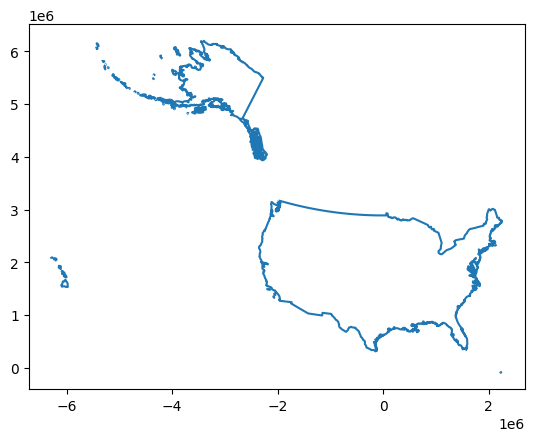

In [ ]:
usa_5070.boundary.plot()

In [ ]:
type(usa_5070.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
usa_5070.boundary.to_frame()

,0
229,"MULTILINESTRING ((-2397308.957 4415014.136, -2..."


In [ ]:
usa_5070.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 229 to 229
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [ ]:
# conversion
usa_border = usa_5070.boundary.to_frame()

# new column (optional)
usa_border['name'] = 'USA'

# renaming the geometry column
usa_border.rename(columns={0: 'geometry'}, inplace=True)

# setting the geometry (the name is not enough)
usa_border = usa_border.set_geometry("geometry")

# verifying CRS
usa_border.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
usa_border

,geometry,name
229,"MULTILINESTRING ((-2397308.957 4415014.136, -2...",USA


In [ ]:
usa_5070.geom_type.unique()

array(['MultiPolygon'], dtype=object)

### Exercise 4

<div class="alert-success">

1. Look for sub administrative divisions of your country
2. Check all the CRSs of those divisions
3. If you find one CRS is missing, fill the CRS with the right projection. If not, just state nothing is to be done.
</div>

### Exercise 5

<div class="alert-success">

1. Transform the co2 and forest variables.
2. Discretize the result chosen.
3. Make the maps for the co2 and forest variables.
4. Add another variable (merge) from the web (or any other source). Transform it , discretize it, and map it.
   
    
</div>